# Comparison: Mar 13, 2007, Old: 202111 New:Tracer Neumann (daily average)

In [1]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [2]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [3]:
year = '2007'
olddir = ''
newdir = 'neumann'

In [12]:
def surface_plots(tracers, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=False, olddir=olddir, d201905=False, zoom=[0, 0, 0, 0], dl=0, dosum=False):
    fig, axs = plt.subplots(1, 3, figsize=(15, 7))

    if d201905:
        dm = xr.open_dataset(f'/results/SalishSea/month-avg.201905/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    else:
        dm = xr.open_dataset(
            f'/data/sallen/results/MEOPAR/202111/{olddir}/SalishSea_1d_20070201_20080131_{file}_T_20070313-20070313.nc')

    if dosum:
        dm['summed'] = 0.*dm[tracers[0]]
        for tr in tracers:
            dm['summed'] = dm['summed'] + dm[tr]
        tracer = 'summed'
    else:
        tracer = tracers
    
    if twoD:
        mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0, 0])
    else:
        mean_field = np.ma.array(dm[tracer][0, dl], mask=1-tmask[0, dl])
    colours = axs[0].pcolormesh(mean_field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(olddir)
    fig.colorbar(colours, ax=axs[0])
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/202111/{newdir}/SalishSea_1d_20070201_20080131_{file}_T_20070313-20070313.nc')
    
    if dosum:
        ds['summed'] = 0.*ds[tracers[0]]
        for tr in tracers:
            ds['summed'] = ds['summed'] + ds[tr]
    
    if twoD:
        field = np.ma.array(ds[tracer][0], mask=1-tmask[0,0])
    else:
        field = np.ma.array(ds[tracer][0, dl], mask=1-tmask[0, dl])
    colours = axs[1].pcolormesh(field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(newdir)
    fig.colorbar(colours, ax=axs[1])
    
    colours = axs[2].pcolormesh(field-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    axs[2].set_title("New - Old")
    fig.colorbar(colours, ax=axs[2])
    ds.close()
    dm.close()

    for ax in axs:
        viz_tools.set_aspect(ax)
        if sum(zoom) > 0:
            ax.set_ylim(zoom[0], zoom[1])
            ax.set_xlim(zoom[2], zoom[3])

    return fig

In [13]:
def profiles(tracers, file, olddir=olddir, d201905=False, dosum=False):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    if d201905:
        dm = xr.open_dataset(f'/results/SalishSea/month-avg.201905/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    else:
        dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/202111/{olddir}/SalishSea_1d_20070201_20080131_{file}_T_20070313-20070313.nc')
    
    if dosum:
        dm['summed'] = 0.*dm[tracers[0]]
        for tr in tracers:
            dm['summed'] = dm['summed'] + dm[tr]
        tracer = 'summed'
    else:
        tracer = tracers
    
    
    mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0])
    axs[0].plot(mean_field.mean(axis=1).mean(axis=1), deptht, linewidth=2, label='Old')
    axs[1].plot(np.zeros_like(deptht), deptht, linewidth=2, label='Old')
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/202111/{newdir}/SalishSea_1d_20070201_20080131_{file}_T_20070313-20070313.nc')
    
    if dosum:
        ds['summed'] = 0.*ds[tracers[0]]
        for tr in tracers:
            ds['summed'] = ds['summed'] + ds[tr]

    field = np.ma.array(ds[tracer][0], mask=1-tmask[0])
    axs[0].plot(field.mean(axis=1).mean(axis=1), deptht, label='New')
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, label='New')
    print (mean_field.mean(axis=1).mean(axis=1).max(), field.mean(axis=1).mean(axis=1).max())
    ds.close()
    dm.close()

    
    axs[0].invert_yaxis()
    axs[0].legend(loc='best')
    
    axs[1].invert_yaxis()
    axs[1].legend(loc='best')
    
    return fig

In [14]:
def thalweg_plots(tracers, file, cmap, cdiff, vmax, vmin, dvmax, olddir=olddir, d201905=False, maxdepth=0, dosum=False):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    if d201905:
        dm = xr.open_dataset(f'/results/SalishSea/month-avg.201905/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    else:
        dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/202111/{olddir}/SalishSea_1d_20070201_20080131_{file}_T_20070313-20070313.nc')
    
    if dosum:
        dm['summed'] = 0.*dm[tracers[0]]
        for tr in tracers:
            dm['summed'] = dm['summed'] + dm[tr]
        tracer = 'summed'
    else:
        tracer = tracers
        
    mean_field = np.array(dm[tracer][0])
    colours = vis.contour_thalweg(axs[0], mean_field, bathy, mesh, np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)
    axs[0].set_title(olddir)

    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/202111/{newdir}/SalishSea_1d_20070201_20080131_{file}_T_20070313-20070313.nc')
    
    if dosum:
        ds['summed'] = 0.*ds[tracers[0]]
        for tr in tracers:
            ds['summed'] = ds['summed'] + ds[tr]

    field = np.array(ds[tracer][0])
    colours = vis.contour_thalweg(axs[1], field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)

    axs[1].set_title(newdir)
    colours = vis.contour_thalweg(axs[2], field-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                      cmap=cdiff)
 
    axs[2].set_title('New - Old')
    if maxdepth > 0:
        for ax in axs:
            ax.set_ylim(maxdepth, 0)
    ds.close()
    dm.close()

    fig.tight_layout()
    return fig

## Temperature

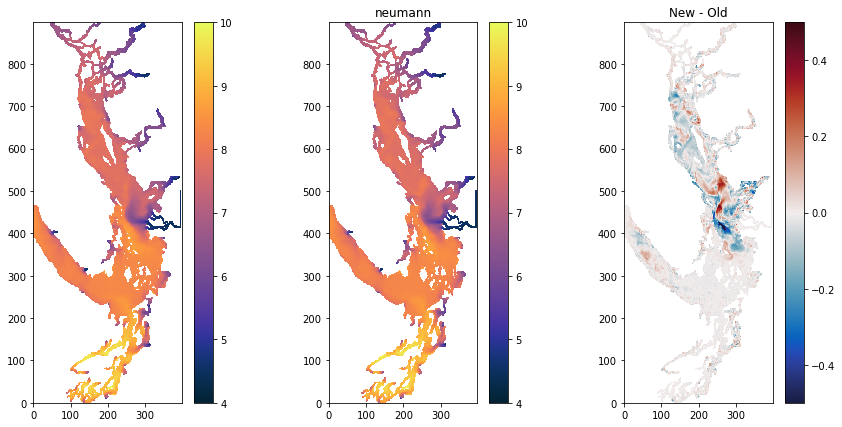

In [16]:
tracer = 'votemper'
file = 'grid'
month = '01'
cmap = cm.thermal
cdiff = cm.balance
vmax = 10
vmin = 4
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

9.235816469522094 9.235281983370713


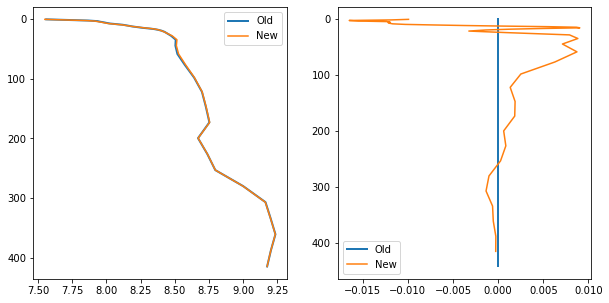

In [17]:
fig = profiles(tracer, file)

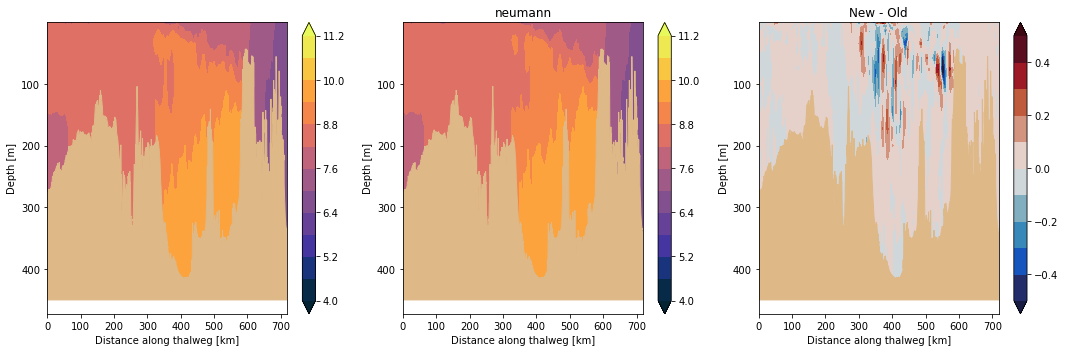

In [18]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Nitrate

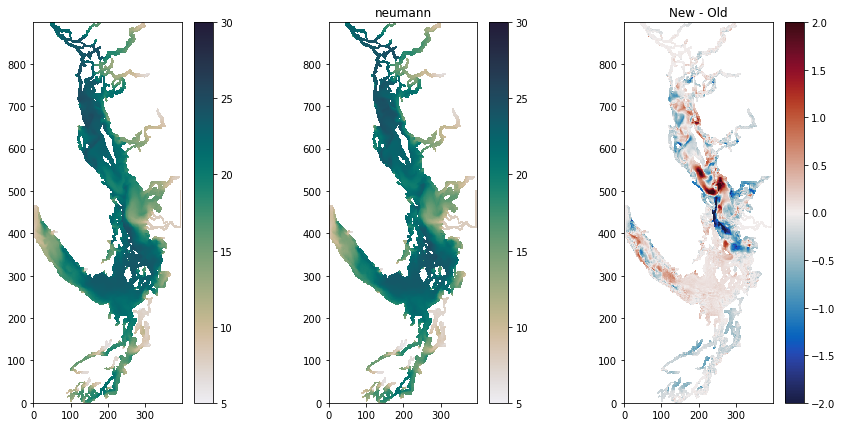

In [19]:
tracer = 'nitrate'
file = 'ptrc'
month = '02'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 5
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

30.337828459677226 30.334184014297705


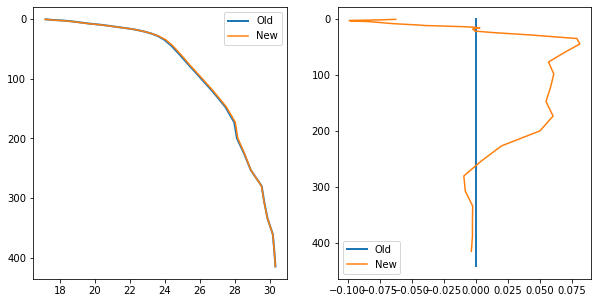

In [20]:
fig = profiles(tracer, file)

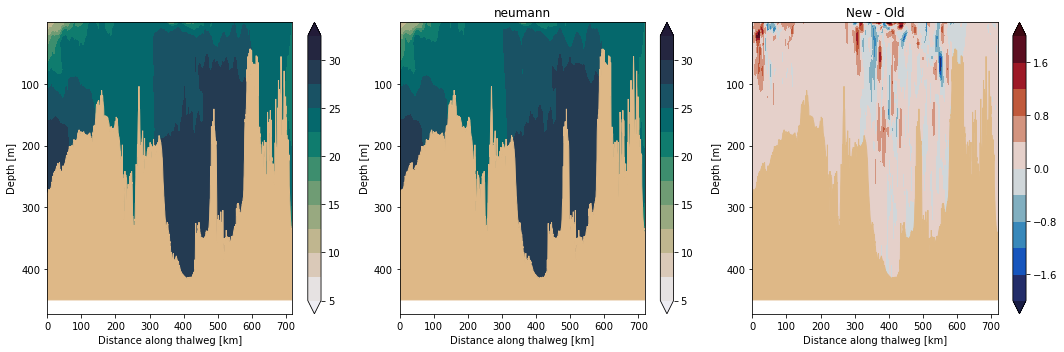

In [21]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Diatoms

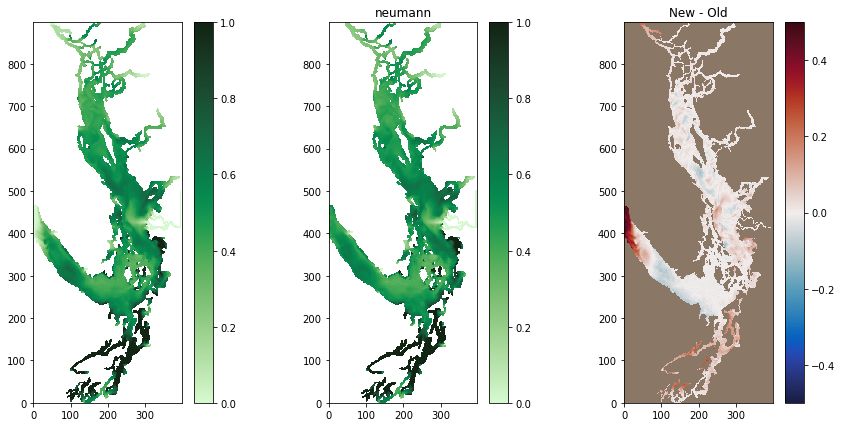

In [70]:
tracer = 'diatoms'
file = 'ptrc'
month = '03'
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.5274504904636776 0.5703371998851854


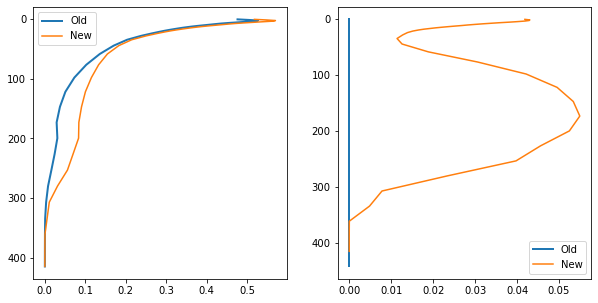

In [71]:
fig = profiles(tracer, file)

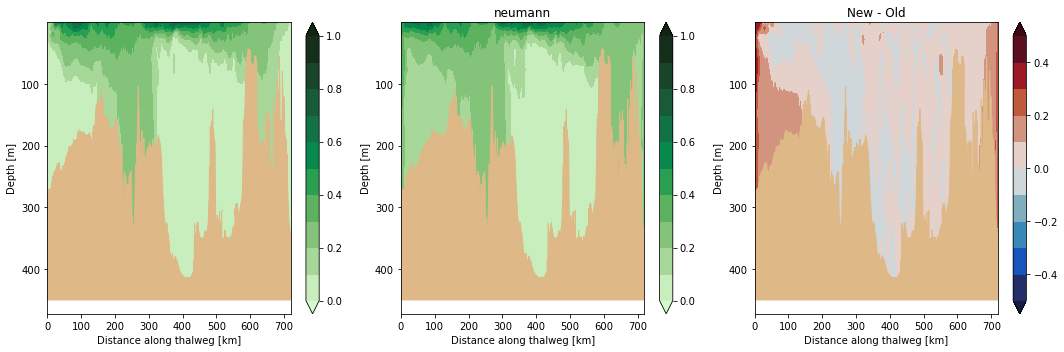

In [72]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Microzooplankton

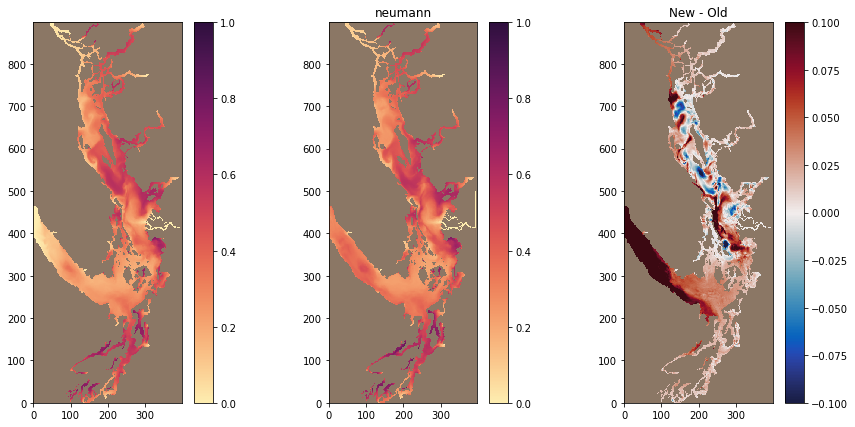

In [25]:
tracer = 'microzooplankton'
file = 'ptrc'
month = '04'
cmap = cm.matter
cmap.set_bad('#8b7765')
cb1 = "Microzooplankton (uM N)"
cdiff = cm.balance
cdiff.set_bad('#8b7765')
cb2 = 'Microzooplankton (uM N)'
vmax = 1
vmin = 0
dvmax = 0.1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.31618082399190367 0.3878417378505604


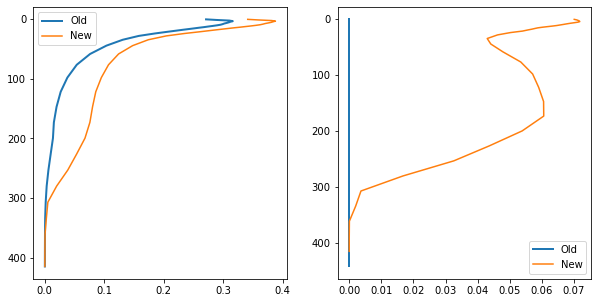

In [26]:
fig = profiles(tracer, file)

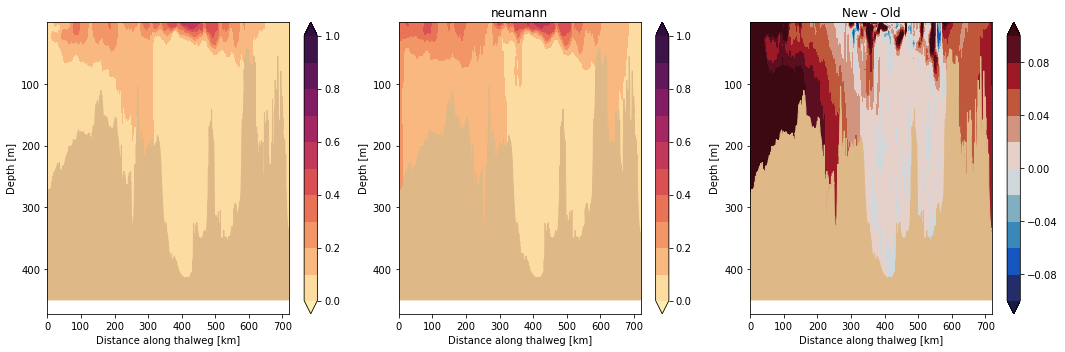

In [27]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Salinity

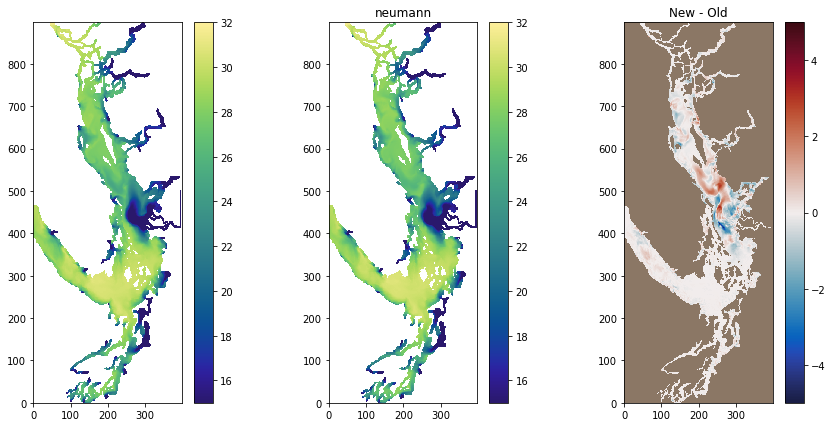

In [28]:
tracer = 'vosaline'
file = 'grid'
month = '05'
cmap = cm.haline
cdiff = cm.balance
vmax = 32
vmin = 15
dvmax = 5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

31.752500798472653 31.752681310112532


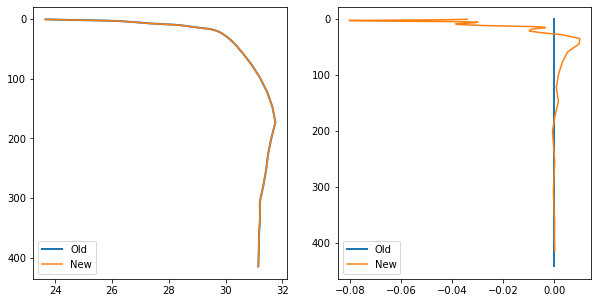

In [29]:
fig = profiles(tracer, file)

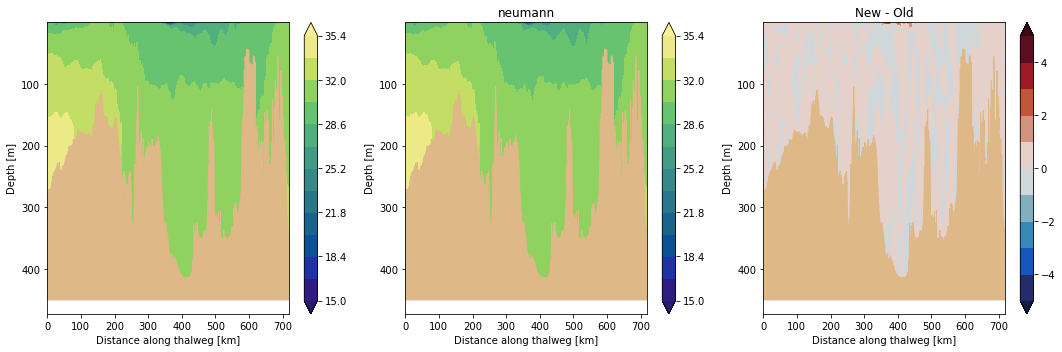

In [30]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Flagellates

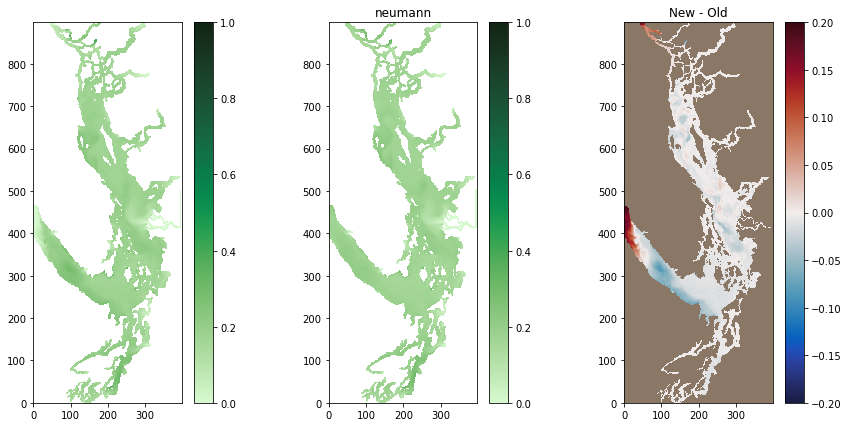

In [31]:
tracer = 'flagellates'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.16948706466722538 0.17049611592267025


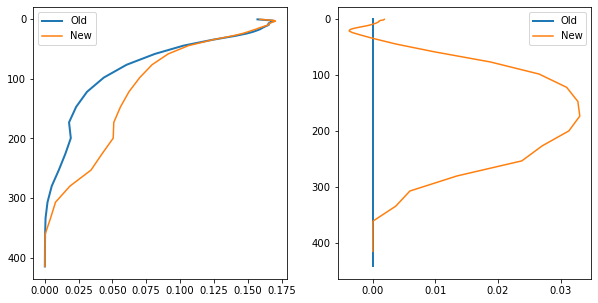

In [32]:
fig = profiles(tracer, file)

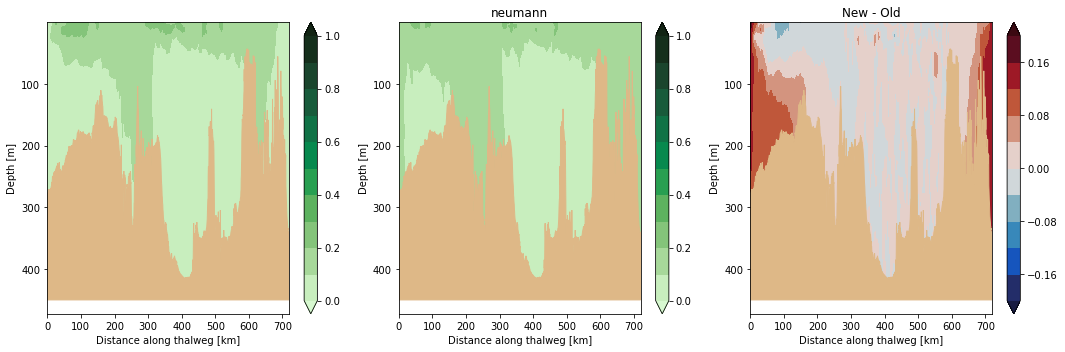

In [33]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## NH4

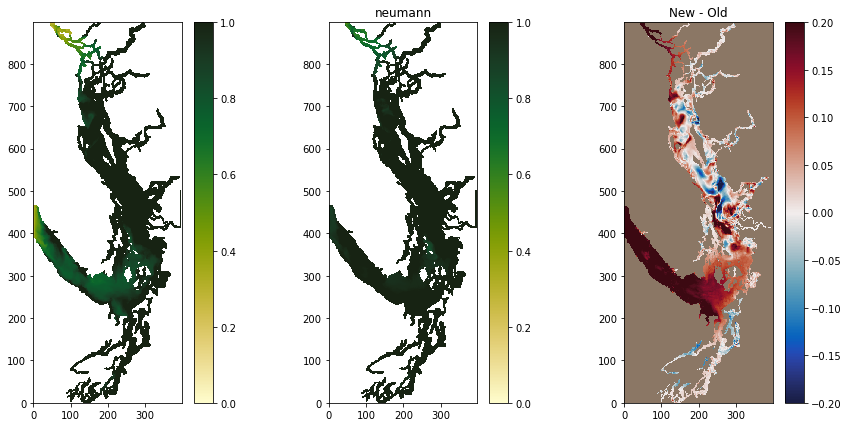

In [34]:
tracer = 'ammonium'
file = 'ptrc'
month = '07'
cmap = cm.speed
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.4596709247380149 1.571816928780815


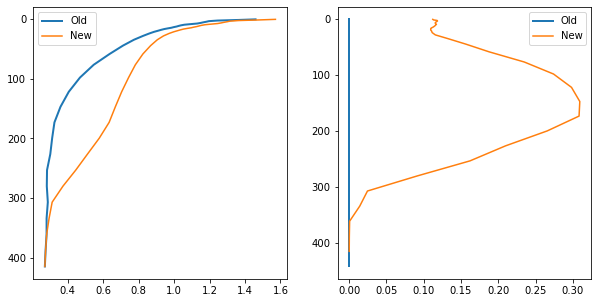

In [35]:
fig = profiles(tracer, file)

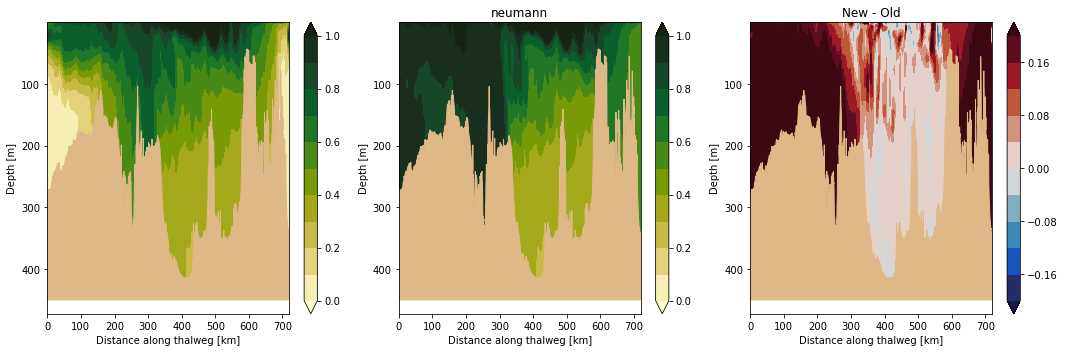

In [36]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## SSH

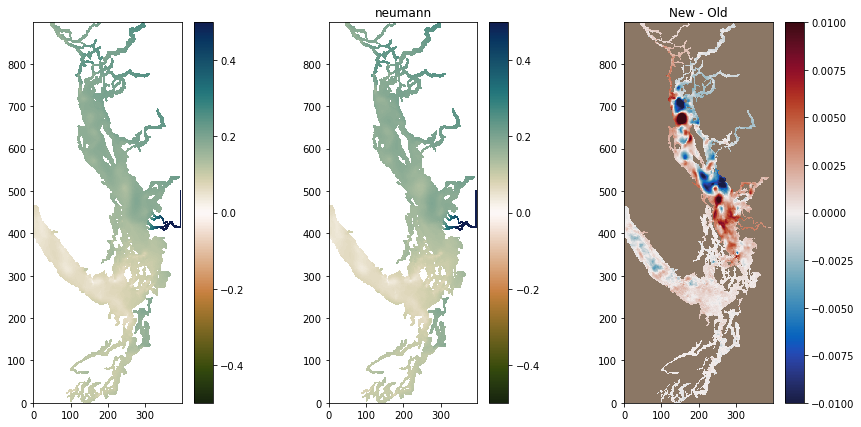

In [37]:
tracer = 'sossheig'
file = 'grid'
month = '08'
cmap = cm.tarn
cdiff = cm.balance
vmax = 0.5
vmin = -0.5
dvmax = 0.01
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=True)

## PON

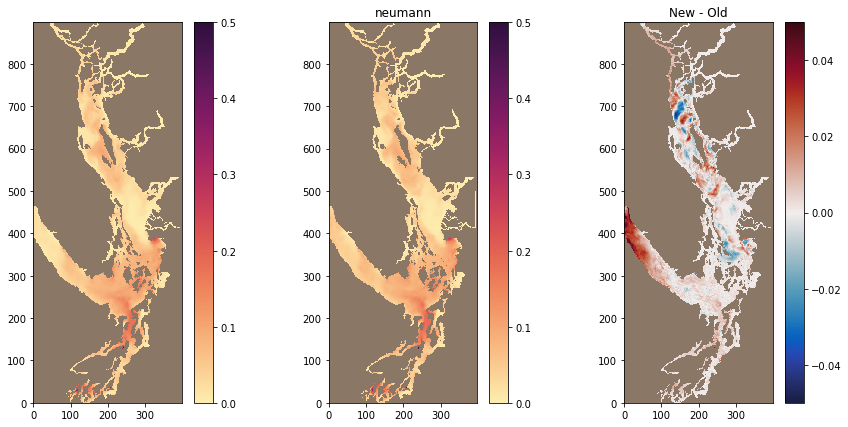

In [38]:
tracer = 'particulate_organic_nitrogen'
file = 'ptrc'
month = '09'
cmap = cm.matter
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.05
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.14076235457469546 0.15057825623849141


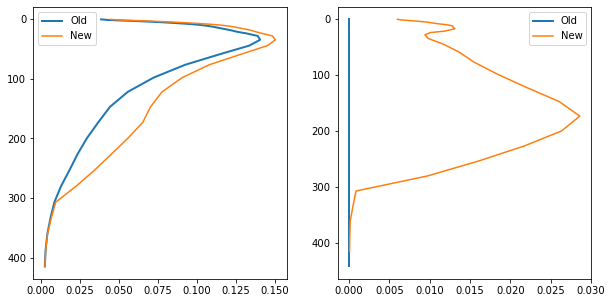

In [39]:
fig = profiles(tracer, file)

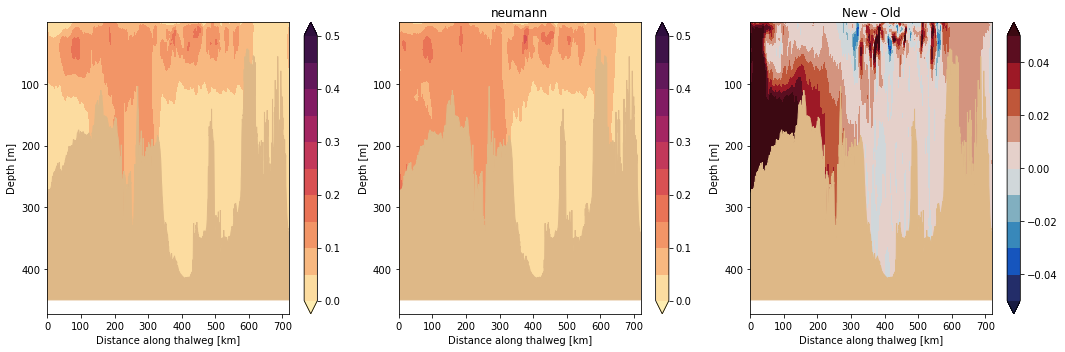

In [40]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Biogenic Silicon

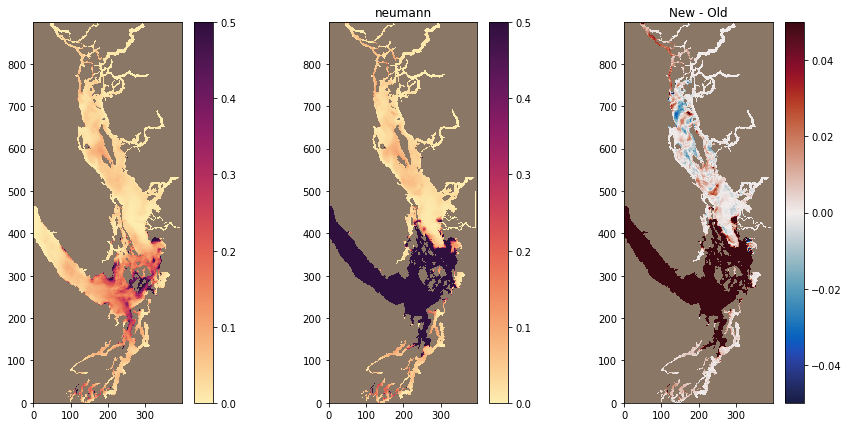

In [54]:
tracer = 'biogenic_silicon'
file = 'ptrc'
cmap = cm.matter
cdiff = cm.balance
vmax = 0.5
vmin = 0
dvmax = 0.05
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.7614139020463138 26009647547.044537


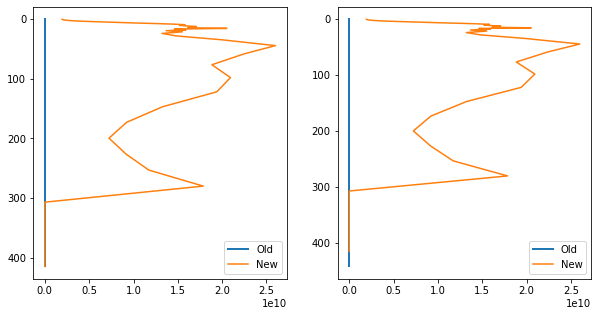

In [55]:
fig = profiles(tracer, file)

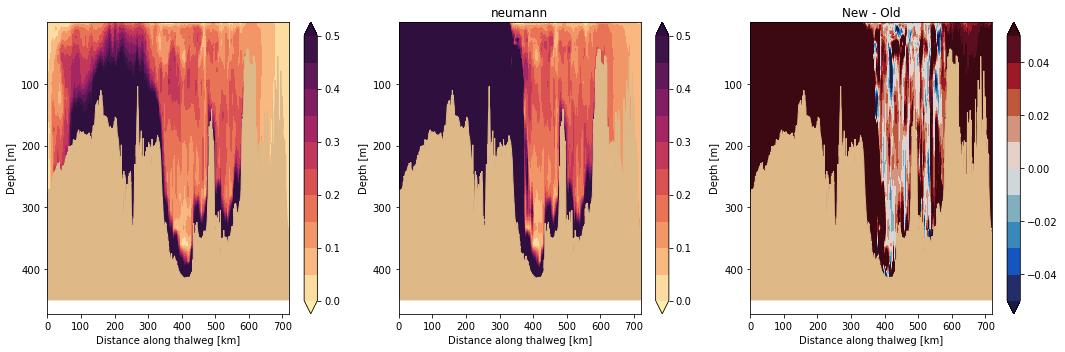

In [56]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Dissolved Silicon

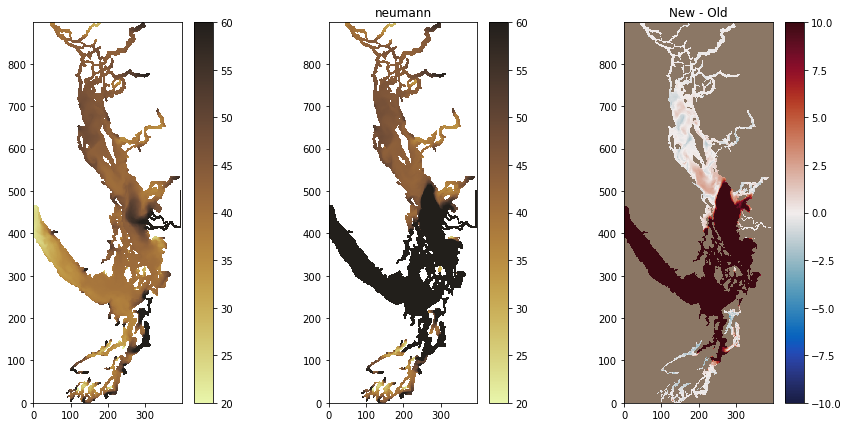

In [41]:
tracer = 'silicon'
file = 'ptrc'
month = '10'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 20
dvmax = 10
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

74.95892221592266 581397199.1234074


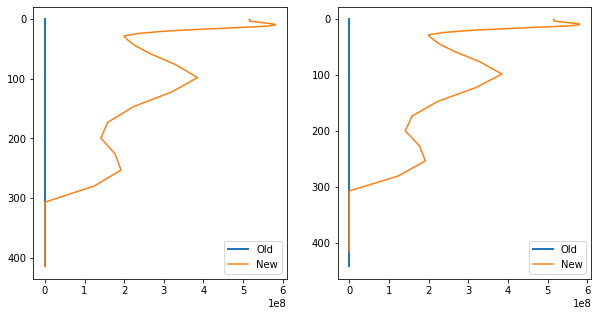

In [42]:
fig = profiles(tracer, file)

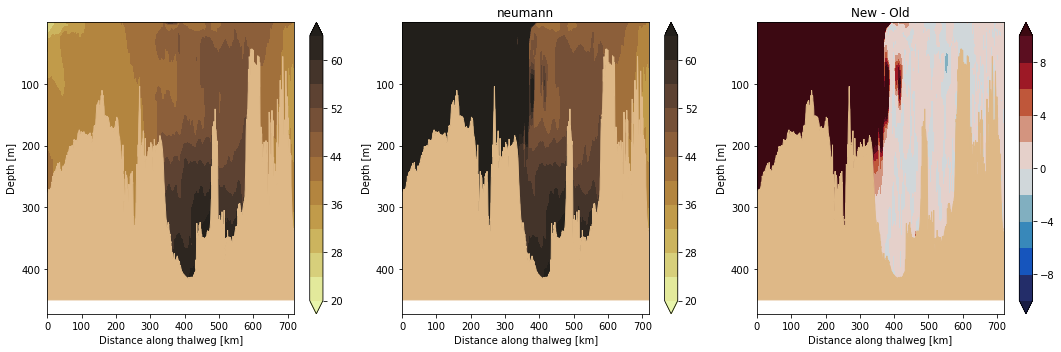

In [43]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## DIC

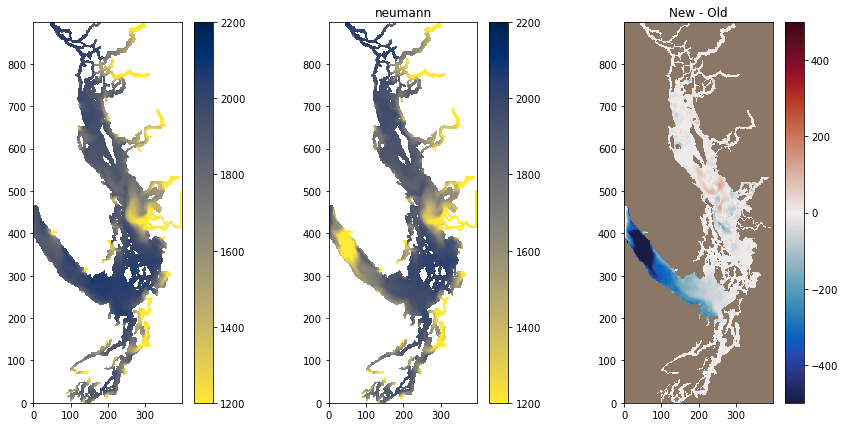

In [67]:
tracer = 'dissolved_inorganic_carbon'
file = 'carp'
cmap = 'cividis_r'
cdiff = cm.balance
vmax = 2200
vmin = 1200
dvmax = 500
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2146.3019108900926 2146.6613211472195


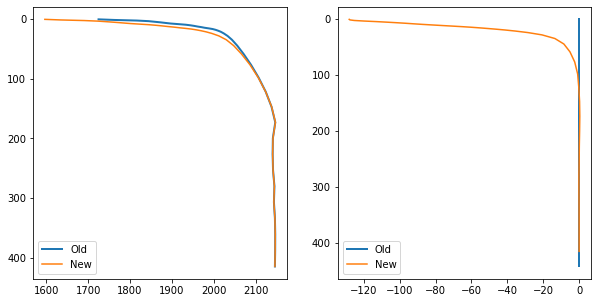

In [68]:
fig = profiles(tracer, file)

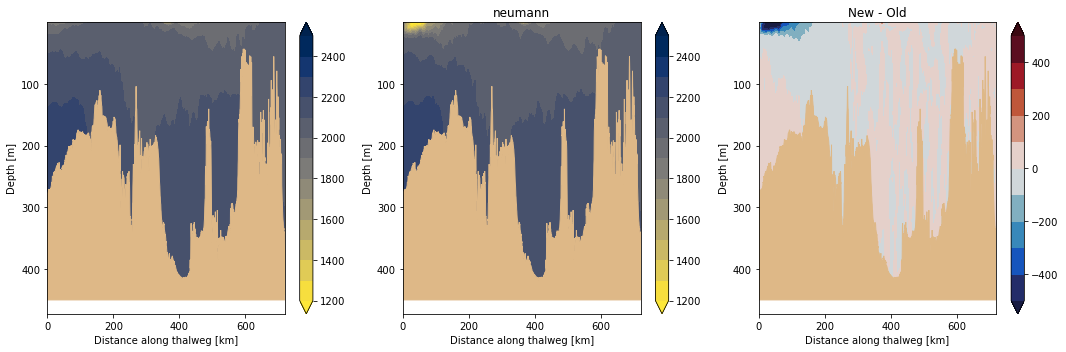

In [69]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Dissolved Organic Nitrate

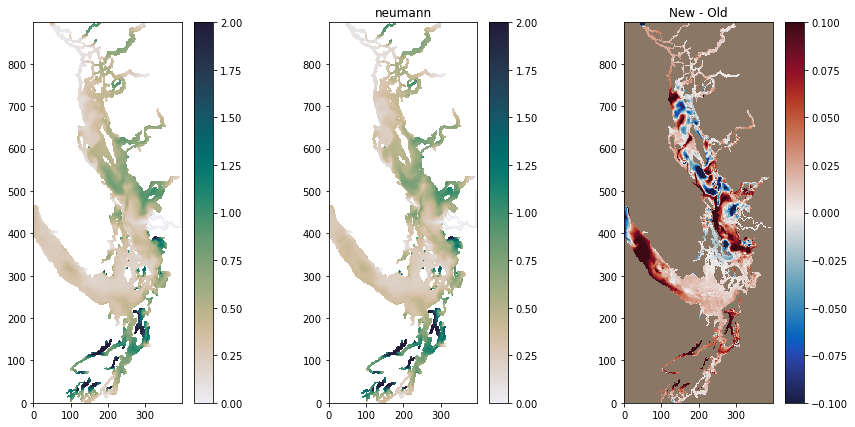

In [61]:
tracer = 'dissolved_organic_nitrogen'
file = 'ptrc'
cmap = cm.rain
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.468492855597085 0.4971498570401555


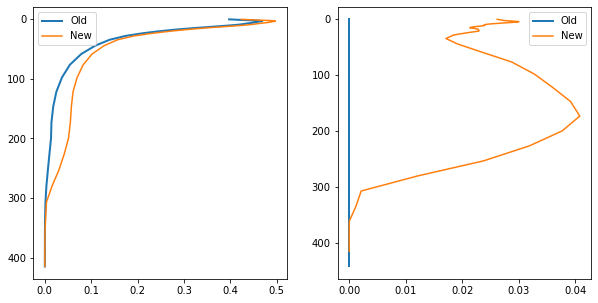

In [62]:
fig = profiles(tracer, file)

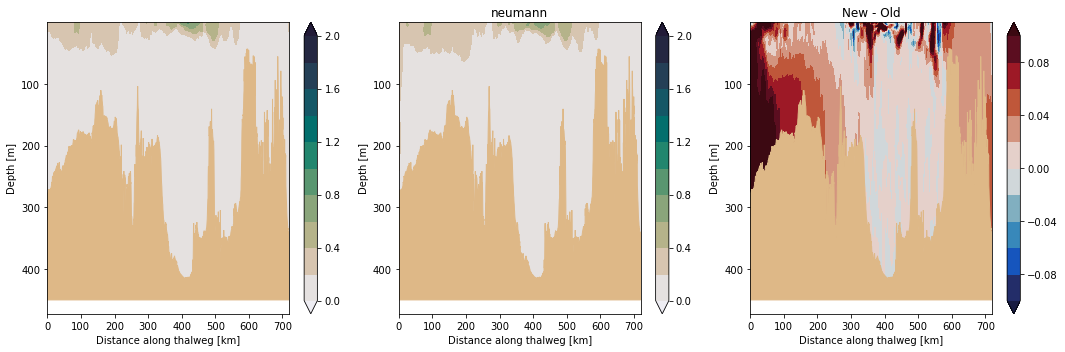

In [63]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Alkalinity

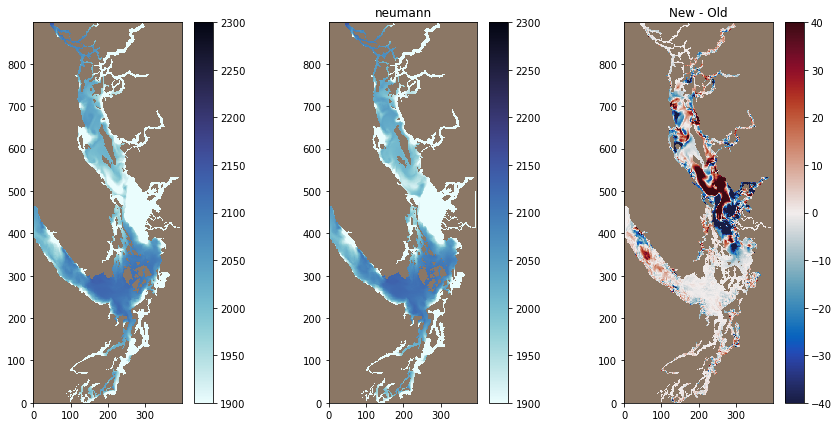

In [47]:
tracer = 'total_alkalinity'
file = 'carp'
month = '12'
cmap = cm.ice_r
cmap.set_bad('#8b7765')
cdiff = cm.balance
vmax = 2300
vmin = 1900
dvmax = 40
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2181.9668331026755 2181.9560179827504


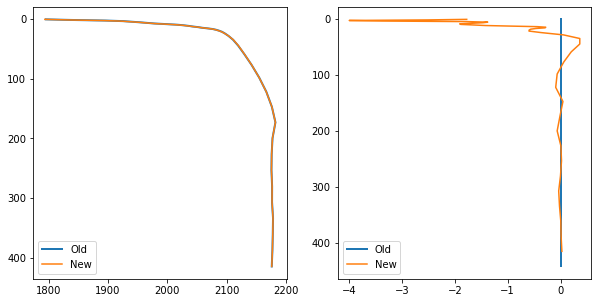

In [48]:
fig = profiles(tracer, file)

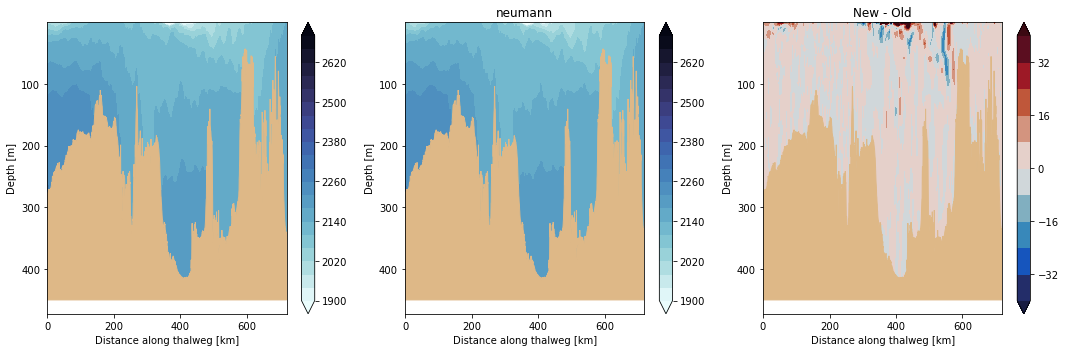

In [49]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## Fraser Tracer

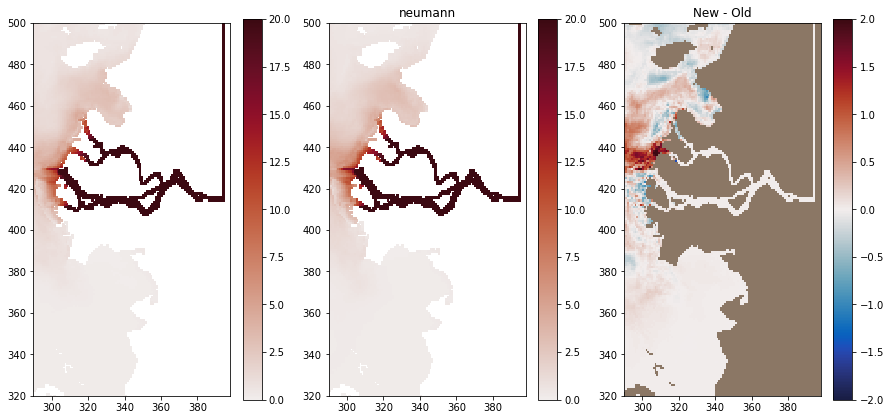

In [50]:
tracer = 'Fraser_tracer'
file = 'carp'
month = '12'
cmap = cm.amp
cdiff = cm.balance
vmax = 20
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dl=3,
                    zoom=[320, 500, 290, 398])

# Oxygen

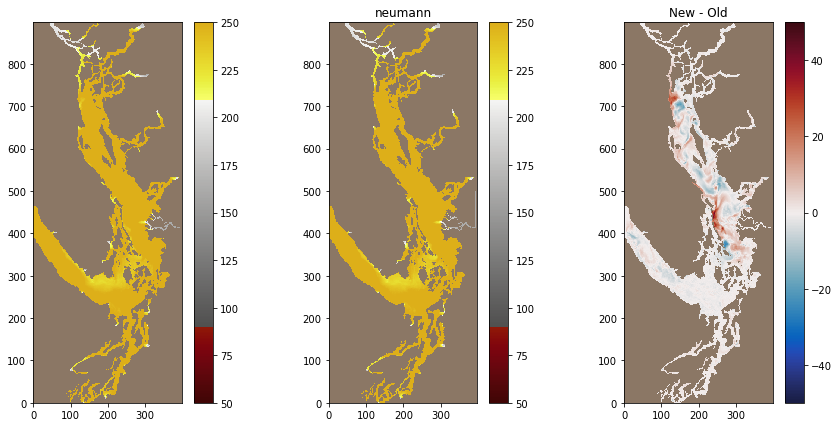

In [51]:
tracer = 'dissolved_oxygen'
file = 'carp'
month = '12'
cmap = cm.oxy
cmap.set_bad('#8b7765')
cdiff = cm.balance
vmax = 250
vmin = 50
dvmax = 50
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

271.47279643613757 272.01860537522015


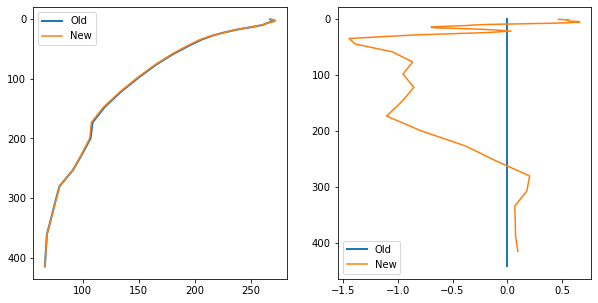

In [52]:
fig = profiles(tracer, file)

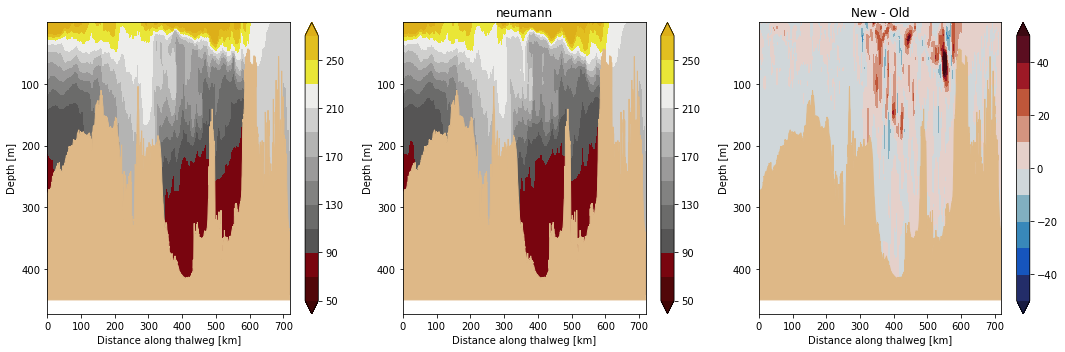

In [53]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)